Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1//
                date location_key  new_confirmed  new_deceased  new_recovered  \
0         2020-01-01           AD            0.0           0.0            NaN   
1         2020-01-02           AD            0.0           0.0            NaN   
2         2020-01-03           AD            0.0           0.0            NaN   
3         2020-01-04           AD            0.0           0.0            NaN   
4         2020-01-05           AD            0.0           0.0            NaN   
...              ...          ...            ...           ...            ...   
12525820  2022-09-09           ZW           11.0           0.0            NaN   
12525821  2022-09-10           ZW           18.0           0.0            NaN   
12525822  2022-09-11           ZW            0.0           0.0            NaN   
12525823  2022-09-12           ZW           51.0         

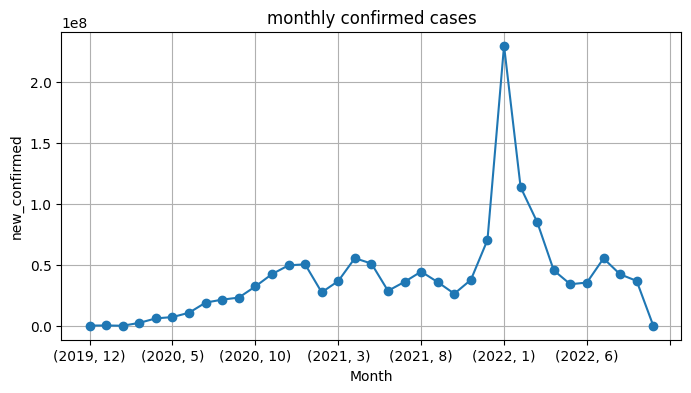

In [15]:
#@title Default title text


from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt

path='/content/drive/My Drive/epidemiology.csv'
data=pd.read_csv(path)
print('1//')
print(data)
#1
print('2//')
print(data.head())
#2
print('3//')
print(data.shape)
#3
print('4//')
print(data.info())
#4
print('5//')
print(data.describe())
#5
print('6//')
print(data.dropna())
#6
print('7//')
print(data.isnull().any(axis=1).head())
#7
print('8//')
print(data.dropna(how='all'))
#8
print('9//')
print(data.dropna(axis=1,how='all'))
#9
print('10//')
print(data.dropna(thresh=5))
#10
print('11//')
print(data.fillna(0))
#11
print('12//')
print(data.notnull())
#12 sum of columns
print('13//')
print("total deceased=",data['new_deceased'].sum())
print("total confirmed=",data['new_confirmed'].sum())
#13 groupby rows
print('14//')
data['date']=pd.to_datetime(data['date'])
data['Month']=data['date'].dt.month
data['Year']=data['date'].dt.year
monthly_confirmed=data.groupby(['Year','Month'])['new_confirmed'].sum()
print('pateints confirmed monthly=',monthly_confirmed)
#14
print('15//')
worst_affectloc=data.groupby('location_key')['new_deceased'].sum().nlargest(5)
print('worst affected locations are ',worst_affectloc)
recover_quick=data.groupby('location_key')['new_recovered'].sum().nlargest(5)
print('quickly recovering locations are ',recover_quick)
#15 matplotlib
print('16//')
plt.figure(figsize=(8,4))
monthly_confirmed.plot(kind='line',marker='o')
plt.xlabel('Month')
plt.ylabel('new_confirmed')
plt.title('monthly confirmed cases')
plt.grid(True)
plt.show()
